In [1]:
import numpy as np
import matplotlib.pyplot as plt
import re
np.set_printoptions(threshold=np.nan)

## Wall time and speedup

In [2]:
with open('result_5000_Fredholm2.txt', 'r') as myfile:
    data=myfile.read()
times = np.array([float(a) for a in re.findall('[0-9]+\.[0-9]+', data)]).reshape(-1, 4, 5)
t = np.min(times[:,:,0], axis=1)
t_all = np.min(times[:,:,2], axis=1)
print(t.shape)

(16,)


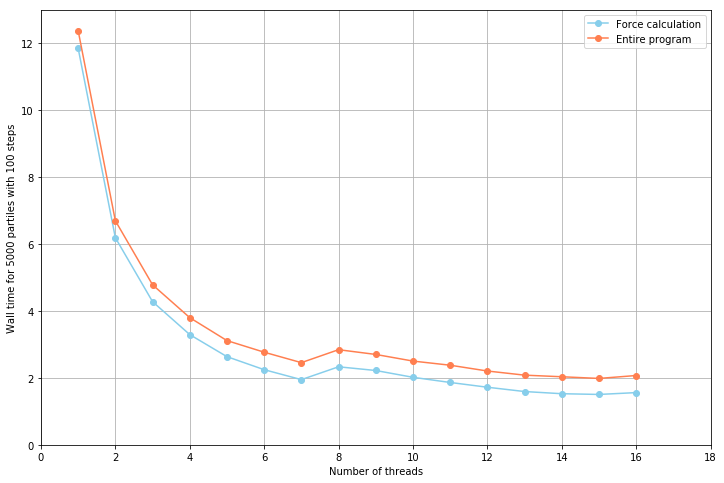

In [3]:
fig = plt.figure(figsize=(12,8))
n = np.array([x+1 for x in range(len(t))])
plt.plot(n, t, '-o', color='skyblue', label='Force calculation')
plt.plot(n, t_all,'-o', color='coral', label='Entire program' )
plt.legend()
plt.legend()
plt.ylim(0,13)
plt.xlim(0, 18)
plt.xlabel('Number of threads')
plt.ylabel('Wall time for 5000 partiles with 100 steps')
plt.grid()
plt.savefig('Walltime_n_thread.png')
plt.show()

[1.0, 1.9151675984467516, 2.770294386584203, 3.598621701209131, 4.49910986480799, 5.279359144552298, 6.085835832495716, 5.084526644272965, 5.337433502256511, 5.875551121472723, 6.362478244092296, 6.888368336495191, 7.444777343494883, 7.763313404100664, 7.875483618101136, 7.599004287575902]


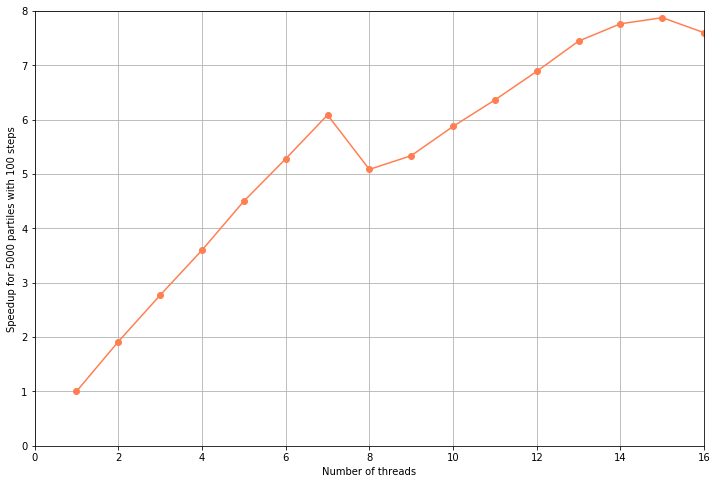

In [4]:
speedup = [t[0]/t[x] for x in range(16)]
print(speedup)

fig = plt.figure(figsize=(12,8))
n = np.array([x+1 for x in range(16)])
plt.plot(n, speedup,'-o', color='coral')
plt.ylim(0,8)
plt.xlim(0, len(t))
plt.xlabel('Number of threads')
plt.ylabel('Speedup for 5000 partiles with 100 steps')
plt.grid()
plt.savefig('Speedup_n_thread.png')
plt.show()

## Computer specs

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              16
On-line CPU(s) list: 0-15
Thread(s) per core:  2
Core(s) per socket:  4
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               26
Model name:          Intel(R) Xeon(R) CPU           E5520  @ 2.27GHz
Stepping:            5
CPU MHz:             1600.089
CPU max MHz:         2267,0000
CPU min MHz:         1600,0000
BogoMIPS:            4533.56
Virtualization:      VT-x
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            8192K
NUMA node0 CPU(s):   0-3,8-11
NUMA node1 CPU(s):   4-7,12-15

## cronstedt

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              16
On-line CPU(s) list: 0-15
Thread(s) per core:  2
Core(s) per socket:  4
Socket(s):           2
NUMA node(s):        2
Vendor ID:           GenuineIntel
CPU family:          6
Model:               26
Model name:          Intel(R) Xeon(R) CPU           E5520  @ 2.27GHz
Stepping:            5
CPU MHz:             1600.037
CPU max MHz:         2268,0000
CPU min MHz:         1600,0000
BogoMIPS:            4533.31
Virtualization:      VT-x
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            8192K
NUMA node0 CPU(s):   0-3,8-11
NUMA node1 CPU(s):   4-7,12-15

In [5]:
with open('result_5000_cronstedt.txt', 'r') as myfile:
    data=myfile.read()
times = np.array([float(a) for a in re.findall('[0-9]+\.[0-9]+', data)]).reshape(-1, 4, 5)
t = np.min(times[:,:,0], axis=1)
t_all = np.mean(times[:,:,2], axis=1)
print(t.shape)

(32,)


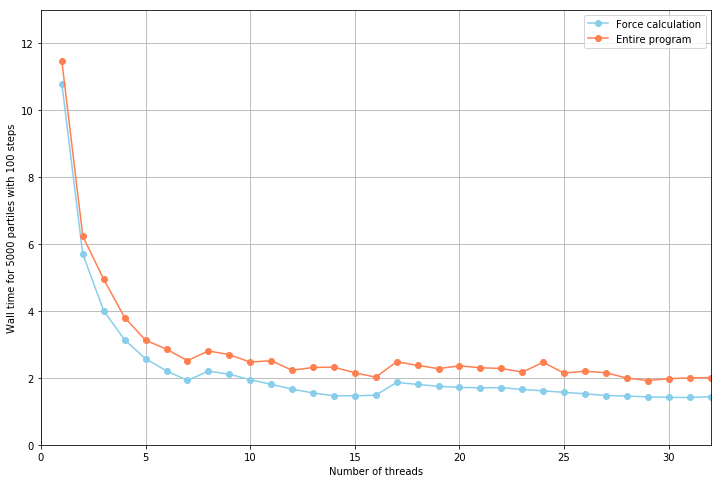

In [6]:
fig = plt.figure(figsize=(12,8))
n = np.array([x+1 for x in range(len(t))])
plt.plot(n, t, '-o', color='skyblue', label='Force calculation')
plt.plot(n, t_all,'-o', color='coral', label='Entire program' )
plt.legend()
plt.legend()
plt.ylim(0,13)
plt.xlim(0, len(t))
plt.xlabel('Number of threads')
plt.ylabel('Wall time for 5000 partiles with 100 steps')
plt.grid()
plt.savefig('Walltime_n_thread_cron.png')
plt.show()

In [13]:
print(np.argmin(t)+1)
print(np.argmin(t_all)+1)

31
29


In [12]:
np.min(t_all)

1.92175

[1.0, 1.8938384718156376, 2.6936400212965266, 3.4402812924994404, 4.193602979493829, 4.885578313029376, 5.610273123704201, 4.90108581025661, 5.11685097896597, 5.543290491363373, 5.969562766594772, 6.480238012169631, 6.96151377434015, 7.36569535772936, 7.365212756228168, 7.272730029720385, 5.783003433417056, 5.983261939638969, 6.169328905447409, 6.286636136916666, 6.333981121599112, 6.315639312831905, 6.523725782738642, 6.6916239791106396, 6.881611234539244, 7.081014879226038, 7.324287270469022, 7.40516491879121, 7.530370262856552, 7.612537431353807, 7.6286169939778325, 7.513189774008939]


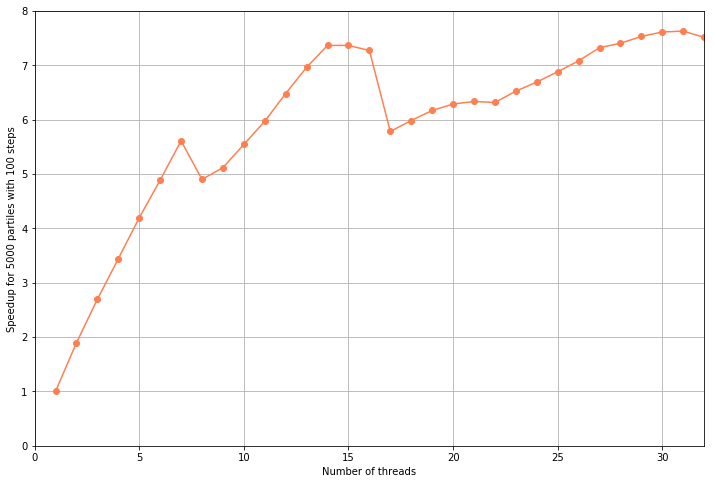

In [7]:
speedup = [t[0]/t[x] for x in range(len(t))]

fig = plt.figure(figsize=(12,8))
n = np.array([x+1 for x in range(len(t))])
plt.plot(n, speedup,'-o', color='coral')
plt.ylim(0,8)
plt.xlim(0, len(t))
plt.xlabel('Number of threads')
plt.ylabel('Speedup for 5000 partiles with 100 steps')
plt.grid()
plt.savefig('Speedup_n_thread_cron.png')
plt.show()